In [81]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
t = pd.read_csv('/gpfs/home/denesl01/scratch/projects/MSC_GEMs/differentiation_22.10.27_14day_timecourse/consolidated.csv')
t = t[t['compartment']=='nuc']
plate_map = pd.read_csv('/gpfs/home/denesl01/scratch/libLTD/GemAnalysis/Book1.csv', header=None)
t['diff'] = 'temp'
t['time'] = 'temp'
t['density'] = 'temp'
for item in t['field_0']:
    coords = (ord(item[0])-65, int(item[1]))
    label = plate_map.iloc[coords]
    diff, density, time = label.split(' ')
    time = (21-int(time[1:]))
    t.loc[t['field_0'] == item, 'diff'] = diff
    t.loc[t['field_0'] == item, 'time'] = time    
    t.loc[t['field_0'] == item, 'density'] = density

In [103]:
print(t)

      Unnamed: 0     alpha      Deff  lin_Deff compartment    nuc_file  \
0              1  0.365305  0.069063  0.190879         nuc  E4_004.nd2   
2              1  0.746241  0.306451  0.504133         nuc  A8_008.nd2   
4              1  0.837477  0.482182  0.664910         nuc  D2_020.nd2   
6              1  0.847675  0.454148  0.616338         nuc  D4_006.nd2   
8              1  0.731840  0.187085  0.317539         nuc  A3_010.nd2   
...          ...       ...       ...       ...         ...         ...   
1730           1  0.759508  0.333391  0.536913         nuc  A5_014.nd2   
1732           1  0.877891  0.700826  0.889965         nuc  D8_008.nd2   
1734           1  0.439224  0.054872  0.144740         nuc  E3_014.nd2   
1736           1  0.830574  0.424273  0.597993         nuc  A7_002.nd2   
1738           1  0.721835  0.199220  0.339317         nuc  A1_002.nd2   

        gem_file field_0  field_1 diff time density  
0     E4_003.nd2      E4        4   OS   21      DE  
2  

In [99]:
#data = t[t['density'] == 'DE']

<AxesSubplot: xlabel='time', ylabel='Deff'>

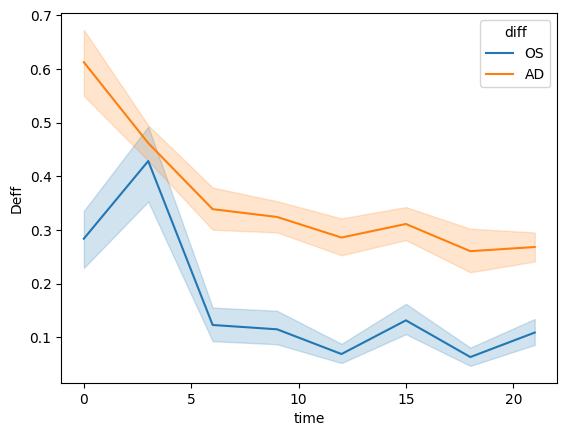

In [102]:
sns.lineplot(data=t, y='Deff', x='time', hue='diff')

In [104]:
df = pd.read_csv('/gpfs/home/denesl01/scratch/projects/MSC_GEMs/differentiation_22.12.15_3day_timecourse/consolidated.csv')

In [105]:
print(df)

      Unnamed: 0     alpha      Deff  lin_Deff compartment         nuc_file  \
0              1  0.757844  0.263945  0.429361         nuc   48_C_D_016.nd2   
1              2  0.534659  0.108604  0.258525        cyto   48_C_D_016.nd2   
2              1  0.646393  0.134450  0.263706         nuc  48_AA_D_014.nd2   
3              2  0.295387  0.045299  0.126476        cyto  48_AA_D_014.nd2   
4              1  0.780713  0.317166  0.490630         nuc  24_AA_S_004.nd2   
...          ...       ...       ...       ...         ...              ...   
1194           2  0.819700  0.438981  0.635055        cyto   24_C_S_012.nd2   
1195           1  0.835578  0.514574  0.713358         nuc    6_O_S_016.nd2   
1196           2  0.858916  0.484656  0.646543        cyto    6_O_S_016.nd2   
1197           1  0.895402  0.806713  0.995954         nuc    6_A_S_010.nd2   
1198           2  0.930511  0.791521  0.912814        cyto    6_A_S_010.nd2   

             gem_file  field_0 field_1 field_2  fie

<AxesSubplot: xlabel='field_0', ylabel='Deff'>

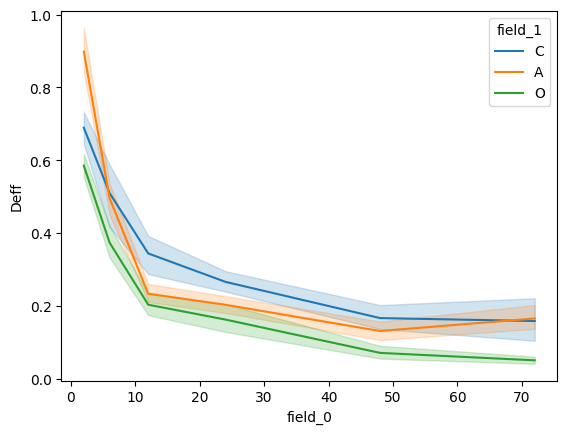

In [111]:
data = df[(df['field_1'] == 'C') | (df['field_1'] == 'O') | (df['field_1'] == 'A')]
data = data[data['field_2'] == 'D']
data = data[data['compartment'] == 'nuc']
sns.lineplot(data=data, x='field_0', y='Deff', hue='field_1')